# Table of Contents
 <p><div class="lev2"><a href="#Adaptive-versions">Adaptive versions</a></div><div class="lev3"><a href="#The-Least-Mean-Square-(LMS)-Algorithm">The Least Mean Square (LMS) Algorithm</a></div><div class="lev3"><a href="#Illustation-of-the-LMS-in-an-identification-problem">Illustation of the LMS in an identification problem</a></div><div class="lev4"><a href="#Identification-procedure">Identification procedure</a></div><div class="lev4"><a href="#Stability-of-results">Stability of results</a></div><div class="lev4"><a href="#Study-with-respect-to-$\mu$">Study with respect to $\mu$</a></div><div class="lev4"><a href="#Tracking-capabilities">Tracking capabilities</a></div><div class="lev3"><a href="#Convergence-properties-of-the-LMS">Convergence properties of the LMS</a></div><div class="lev3"><a href="#The-normalized-LMS">The normalized LMS</a></div><div class="lev3"><a href="#Other-variants-of-the-LMS">Other variants of the LMS</a></div><div class="lev3"><a href="#Recursive-Least-Squares">Recursive Least Squares</a></div>

In [1]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
... Redefining interactive from ipywidgets


In [2]:
import mpld3
mpld3.enable_notebook()
import warnings
warnings.simplefilter('default')

### The normalized LMS

A simple variant of the LMS relies on the idea of introducing an non constant step-size $\mu_n$ and to determine an optimum value for the step-size at each iteration. A simple way to show the result is as follows. 
- The standard error, before updating the LMS from $\wb(n)$ into $\wb(n+1)$,  is 
$$e(n|n)=\wb(n)^T\ub(n) - d(n)$$
- After having updated the filter, we can recompute the error, as
$$e(n|n+1)=\wb(n+1)^T\ub(n) - d(n).$$
This error is called *a posteriori* error, since it is calculated with the updated filter. This is also indicated by the notation $.|n+1$ which means "computed using the filter at time $n+1$.  The standard error is thus qualified of *a priori* error. 

Since $\wb(n+1)=\wb(n)-\mu\ub(n)e(n|n)$, we immediately get that
\begin{align}
e(n|n+1)& =\wb(n+1)^T\ub(n) - d(n) \\
& = \left(\wb(n)-\mu_n\ub(n)e(n|n)\right)^T\ub(n) - d(n) \\
& = e(n|n)-\mu_n\ub(n)^T\ub(n)e(n|n) \\
& = \left(1-\mu_n\ub(n)^T\ub(n)\right) e(n|n) 
\end{align}
Evidently, updating must decrease the error. Thus, we must have 
$$
|e(n|n+1)| \leq |e(n|n)|
$$
that is
$$
\left|\left(1-\mu_n\ub(n)^T\ub(n)\right)\right| \leq 1.
$$
This yields the condition
$$
\eqboxc{
0\leq\mu_n \leq \frac{2}{\ub(n)^T\ub(n)}
}.
\label{eq:murangenlms}
$$
The optimum value of the step-size corresponds to the minimum of |e(n|n+1)|, which is simply given by 
$$
\eqboxc{
\mu_n = \frac{1}{\ub(n)^T\ub(n)}
}.
$$
However, the **normalized LMS algorithm** is often given with an auxiliary factor, say $\tilde\mu$, which adds a tuning parameter the algorithm
$$
\eqboxd{
\wb(n+1)=\wb(n)-\frac{\tilde\mu}{\ub(n)^T\ub(n)} \ub(n)\left(\wb(n)^T\ub(n) -d(n)\right) 
}
$$
The condition (\ref{eq:murangenlms}) directly gives
$$
\eqboxd{0\leq\tilde\mu\leq2},
\label{eq:murangenlms_2}
$$
which is a very simple rule.

Implementation of the normalized LMS is a simple modification of the standard LMS. Note that it is useful to introduce a small positive constant in the definition of the step-size
$$
\mu_n = \frac{1}{\ub(n)^T\ub(n)+\epsilon}
$$
in order to avoid division by zero errors.

In [3]:
def normalized_lms(d,u,w,mu):
    """ 
    Implements a single iteration of the stochastic gradient (LMS)\n
    :math:`w(n+1)=w(n)+\\mu u(n)\\left(d(n)-w(n)^T u(n)\\right)̀`
    
    Input:
    ======
        d : desired sequence at time n 
        u : input of length p
        w : wiener filter to update 
        mu : adaptation step for the NLMS; mu <2
    
    Returns:
    =======
        w : upated filter
        err : d-dest
        dest : prediction = :math:`u(n)^T w` 
    """
    assert mu<2, "In the normalized case, mu must be less than 2"
    u=squeeze(u) #Remove single-dimensional entries from the shape of an array.
    w=squeeze(w)
    dest=u.dot(w)
    err=d-dest
    mun=mu/(dot(u,u)+1e-10)  
    w=w+mun*u*err
    return (w,err,dest)

### Other variants of the LMS

The stochastic gradient algorithm is obtained from the theoretical gradient algorithm by approximating the exact statistical quantities by their instantaneous values. This approach can be extended to arbitrary cost functions. Indeed, if we consider a cost function $J(\wb)=\E{f(e(n))}$, with $f$ a positive even function, then the steepest descent algorithm leads to
\begin{align}
\wb(n+1) & =\wb(n) - \mu \deriv{\E{f(e(n))}}{\wb(n)} \\
& = \wb(n) - \mu \E{\ub(n) \deriv{f(e(n))}{\wb(n)}},\\
\end{align}
where we used the chain rule for derivation.

The corresponding stochastic gradient algorithm is then immediately given by
$$
\wb(n+1) = \wb(n) - \mu {\ub(n) \deriv{f(e(n))}{e(n)}}.
$$
Let us look at some examples:
\begin{itemize}
\item if $f(e)=|e|$, then $f'(e)=\mathrm{sign}(e)$ and we obtain the so-called **sign-error** algorithm:
$$
\wb(n+1) = \wb(n) - \mu {\ub(n)\mathrm{sign}(e(n)) }.
$$
This is an early algorithm with very low complexity, which can be implemented without any multiplications (if $\mu$ is a power of 2, then the step-size multiplication can be 
implemented as a bit shift).
\item for $f(e)=|e|^k$, then  $f'(e)=k|e|^{k-1}\mathrm{sign}(e)$, and the stochastic gradient algorithm has the form
$$
\wb(n+1) = \wb(n) - \mu {\ub(n)|e(n)|^{k-1}\mathrm{sign}(e(n)) }.
$$
\end{itemize}

See [Mathews, ece6550 -chapter4](http://www.ece.utah.edu/~mathews/ece6550/chapter4.pdf), page 22, for an example of a piecewise linear cost function leading to a quantization of the error.  

### Recursive Least Squares

Instead of taking an instantaneous estimate of the correlation matrix and vector, it is still possible to go on with the exponential mean estimates
$$
\begin{cases}
\hat\Rb_{uu}(n+1) = \sum_{l=0}^{n+1} \lambda^{l-n-1} \ub(l)\ub(l)^H = \lambda \hat\Rb_{uu}(n) + \ub(n+1)\ub(n+1)^H\\
\hat\Rb_{du}(n+1) = \lambda \hat\Rb_{du}(n) + d(n+1) \ub(n+1).\\
\end{cases}
$$
It remains to compute the solution
\begin{equation}
\hat\wb(n+1) =  \left[\hat\Rb_{uu}(n+1)\right]^{-1} \hat\Rb_{du}(n+1).
\end{equation}
The main problem is the inversion, for each $n$, of the correlation matrix. Fortunately, it is possible to obtain a recursive  solution which do not need a matrix inversion at all...
The key here is to invoke the [matrix inversion lemma](http://en.wikipedia.org/wiki/Woodbury_matrix_identity)
\begin{equation}
[\Ab + \Bb\Db]^{-1} = \Ab^{-1} - \Ab^{-1}\Bb[\Ib + 
\Db\Ab^{-1}\Bb]^{-1}\Db\Ab^{-1}.
\end{equation}
Applying this with $\Ab=\lambda \hat\Rb_{uu}(n-1)$, $\Bb=\ub(n)$ and $\Cb=\ub(n)^H$, and denoting 
$$
\Kb_{n+1} = \left[\hat\Rb_{uu}(n+1)\right]^{-1} 
$$
we readily obtain
\begin{equation}
\Kb(n+1) = \frac{1}{\lambda}\Kb(n) - 
\frac{1}{\lambda^2} \frac{\Kb(n)\ub(n+1)\ub(n+1)^H \Kb(n)}{1+\frac{1}{\lambda}\ub(k+1)^H\Kb(n)\ub(k+1)},
\end{equation}
and after several lines of calculations, we arrive at the updating formula
\begin{equation}
\hat\wb(n+1) = \hat\wb(n) + \Kb(n+1)\ub(n+1)[d(n+1)-\wb(n)^H\ub(n+1)].
\end{equation}
Note that there are some notational differences between the LMS and the RLS. For the LMS, the filter $\wb(n+1)$ is calculated based on the data available at time $n$. For the RLS,  $\wb(n+1)$ is computed using data available at time ($n+1$). This is just a notational difference -- we could easily rename $\wb(n+1)$ into say $\vb(n)$ and obtain similar indexes. However these notations are traditional, so we follow the classical developments and equations. What is important however is to note that both filters are calculated using the *a priori* error, that is the error using the data at time $n$ and the filter computed using the data at time $n-1$. 

##### Initialization - 

The initialization of the algorithm requires the specification of an initial $\wb(0)$ which is usually taken as a null vector. It also requires specifying $\Kb(0)$. Since $\Kb(0)$ is the inverse of the correlation matrix before the beginning of the iterations, we usually choose $\Rb_{uu}(0)=\delta\Ib$, with $\delta$ very small. So the inverse is $\Kb(0)=\delta^{-1}\Ib$, a large value which disappears during the iterations of the algorithm.

An implementation of the RLS algorith is proposed below, using the standard `numpy array` type as well as the `matrix` type. Casting from one type to the other is done by `np.matrix` or `np.array` keywords (which make a copy), or using `np.asmatrix` or `np.asarray` keywords. 

In [4]:
# Implementation using the array type
def algo_rls(u,d,M,plambda):
    N=size(u)
# initialization
    e=zeros(N)
    wrls=zeros((M,N+1))
    Krls=100*eye(M)
    u_v=zeros(M)
    for n in range(N):
        u_v[0]=u[n]
        u_v[1:M]=u_v[0:M-1]#concatenate((u[n], u_v[1:M]), axis=0)
        e[n]=conj(d[n])-dot(conj(u_v),wrls[:,n])
        # print("n={}, Erreur de {}".format(n,e[n]))
        Kn=Krls/plambda
        Krls=Kn-dot(Kn,dot(outer(u_v,conj(u_v)),Kn))/(1+dot(conj(u_v),dot(Kn,u_v)))
        wrls[:,n+1]=wrls[:,n]+dot(Krls,u_v)*conj(e[n])
    return (wrls,e)

## RLS, matrix version

def col(v):
     """ transforms an array into a column vector \n
     This is the equivalent of  x=x(:) under Matlab"""
     v=asmatrix(v.flatten())
     return reshape(v,(size(v),1))
    
def algo_rls_m(u,d,M,plambda):
    """
    Implementation with the matrix type instead of the array type
    """
    N=size(u)
	# initialization
    e=zeros(N)
    wrls=matrix(zeros((M,N+1)))
    Krls=100*matrix(eye(M))
    u=col(u)
    u_v=matrix(col(zeros(M)))
        
    for n in range(N):
        u_v[0]=u[n]
        u_v[1:M]=u_v[0:M-1]
		#u_v=concatenate(u[n], u_v[:M], axis=0)
        e[n]=conj(d[n])-u_v.H*wrls[:,n]
        Kn=Krls/plambda
        Krls=Kn-Kn*(u_v*u_v.H*Kn)/(1+u_v.H*Kn*u_v)
        wrls[:,n+1]=wrls[:,n]+Krls*u_v*conj(e[n])
      
    return (wrls,e)

At this point, it would be useful to do again the previous experimentations (identification with non stationary data) with the RLS algorithm. Then to compare and conclude.


In [5]:
def ident_rls(observation,input_data,factor_lambda=0.95,p=20):
    """ Identification of an impulse response from an observation
    `observation` of its output, and from its input `input_data` \n
    `mu` is the adaptation step\n
    Inputs:
    =======
    observation: array
        output of the filter to identify
    input_data: array
        input of the filter to identify
    factor_lambda: real (defaut value=0.95)
        forguetting factor in the RLS algorithm
    p: int (default =20)
        order of the filter    
    Outputs:
    ========
    w: array
        identified impulse response
    err: array
        estimation error
    yest: array
        estimated output
    """
    N=np.size(input_data)
    input_data=squeeze(input_data) #reshape(input_data,(N))
    observation=squeeze(observation)
    (wrls,e)= algo_rls(input_data,observation,p,factor_lambda)
#   (w[:,t+1],erreur[t],yest[t])=lms(input_data[t:t-p:-1],w[:,t],mun)      
    return (wrls,e)

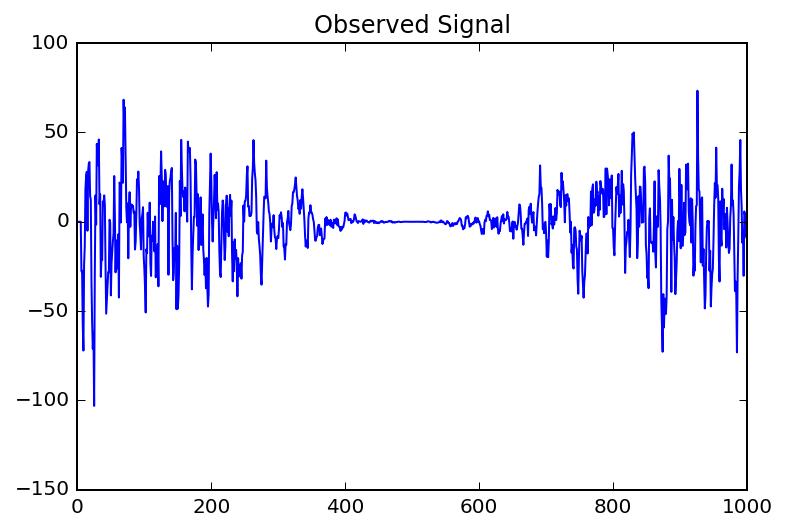

In [6]:
### Slow non-stationarity

N=1000
u=np.random.randn(N)
y=np.zeros(N)
htest=10*np.array([1, 0.7, 0.7, 0.7, 0.3, 0 ])
L=size(htest)
for t in np.arange(L,N):
    y[t]=dot((1+cos(2*pi*t/N))*htest,u[t:t-L:-1])
y+=0.01*np.random.randn(N)
plt.figure()
plt.plot(y)
_=plt.title("Observed Signal")

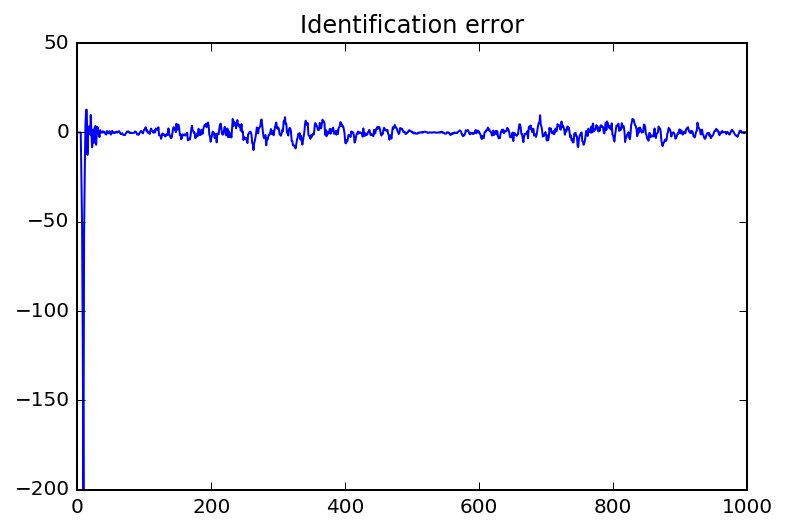

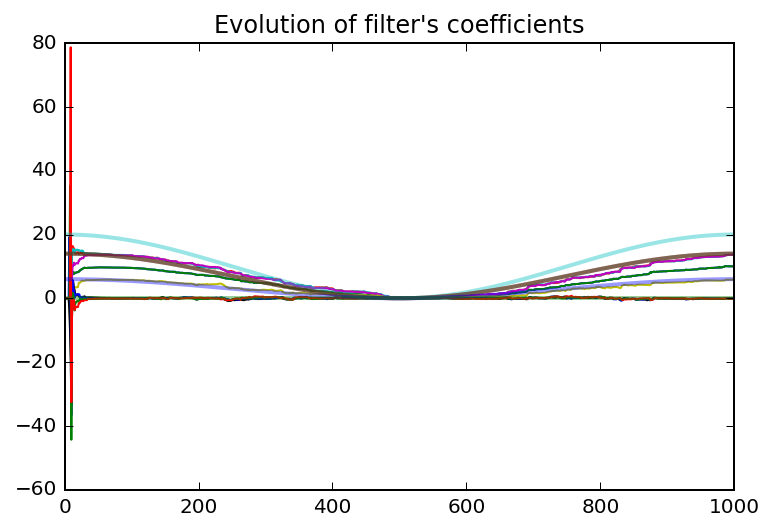

In [7]:
p=7
lamb=0.97
(w,err)=ident_rls(y,u,factor_lambda=lamb,p=10)
plt.figure(1)
clf()
plt.plot(err)
plt.title('Identification error')
figcaption("Identification error in the nonstationary case", label="fig:error_ns_case")
plt.figure(2)
plt.clf()
t=np.arange(0,N+1)
true_ns_h=np.outer((1+cos(2*pi*t/N)),htest)
plt.plot(t,w.T,lw=1)
plt.plot(t,true_ns_h,lw=2,label="True values", alpha=0.4)
plt.title("Evolution of filter's coefficients")
figcaption("Evolution of filter's coefficients", label="fig:coeff_ns_case")

References:

  - http://www.ece.utah.edu/~mathews/ece6550/chapter10.pdf
  - http://www.cs.tut.fi/~tabus/course/ASP/LectureNew10.pdf
  - [Recursive Least Squares at wikipedia](http://en.wikipedia.org/wiki/Recursive_least_squares_filter)
  - <a href="http://www.intechopen.com/books/adaptive-filtering-applications" title="Adaptive Filtering Applications">Adaptive Filtering Applications</a> (open access book at intechopen).

----
<div align=right> [Index](toc.ipynb) - [Back](Grad_algo.ipynb) - [Next](noisecancellationlab.ipynb)</div>